<a href="https://colab.research.google.com/github/karthik4032/NETFLIX/blob/main/NETFLIX_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown 1WMQKKhgmka6SAkCd1_bQtvHX0D0LD6J1

Downloading...
From: https://drive.google.com/uc?id=1WMQKKhgmka6SAkCd1_bQtvHX0D0LD6J1
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 44.1MB/s]


In [ ]:
data = pd.read_csv('netflix.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#data type of each column
data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
#unique elements per column
data.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
data.drop('description',axis = 1,inplace = True)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
#To find out if the cast column needs to be nested or not
#No of cells contains that need to unnested
len(data.loc[data['cast'].str.contains(',',na = False)].index)

7101

In [ ]:
# covert the string to a list of names of string data type
data['cast'] = data['cast'].str.split(', ')

In [ ]:
# explode the cast column so that each item in the list gets a seperate row
data = data.explode('cast')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [ ]:
data['country'] = data['country'].str.split(", ")

In [ ]:
data = data.explode('country')

In [ ]:
data['listed_in'] = data['listed_in'].str.split(", ")

In [ ]:
data = data.explode('listed_in')

In [ ]:
# No of missing values for each column
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
# as you can see the duration cells are miss read and have been inserted into rating column
data.loc[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [ ]:
#replacing the missing values with rating column cells as they are misplace in the rating column
data['duration'] = data['duration'].fillna(data['rating'])

In [ ]:
# Now replacing the cells in the rating column with 'min' values with NaN
data.loc[data['rating'].str.contains('min',na = False),'rating'] = np.nan

In [ ]:
# replacing the NaN values in the date added columns with most common date added for that particular year respectively
for i in data.loc[data['date_added'].isna(),'release_year'].unique():
  imp = data.loc[data['release_year'] == i , 'date_added'].mode()[0]
  data.loc[data['release_year'] == i , 'date_added'] = data.loc[data['release_year'] == i , 'date_added'].fillna(imp)


In [ ]:
# replacing the NaN values in the country column with most common value with respect to the director column
for i in data.loc[data['country'].isna(),'director'].unique():
  if i in data[~data['country'].isna()]['director'].unique():
    imp = data.loc[data['director'] == i , 'country'].mode().values[0]
    data.loc[data['director'] == i , 'country'] = data.loc[data['director'] == i , 'country'].fillna(imp)

In [ ]:
# replacing the remaining NaN values with respect to the cast column
for i in data.loc[data['country'].isna(),'cast'].unique():
  if i in data[~data['country'].isna()]['cast'].unique():
    imp = data.loc[data['cast'] == i , 'country'].mode().values[0]
    data.loc[data['cast'] == i , 'country'] = data.loc[data['cast'] == i , 'country'].fillna(imp)

In [ ]:
# converting the remaining NaN values
data['director'] = data['director'].fillna('Unknown director')
data['cast'] = data['cast'].fillna('Unknown cast')
data['country'] = data['country'].fillna('Unknown country')
data['rating'] = data['rating'].fillna('Not rated')

In [ ]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
data.loc[data['duration'].str.contains('min'),'duration'].value_counts()

,count
duration,
94 min,3591
97 min,3434
93 min,3356
95 min,3192
106 min,3052
...,...
5 min,3
9 min,2
11 min,2


In [ ]:
data_1 = data.copy()

In [ ]:
# converting the date_added column into date_time format
from datetime import datetime
from dateutil.parser import parse
arr = []
for i in data_1['date_added'].values:
  dt_i = parse(i)
  arr.append(dt_i.strftime('%Y-%m-%d'))

data_1['modified_date_added'] = arr
data_1['modified_date_added'] = pd.to_datetime(data_1['modified_date_added'])
data_1['year_added'] = data_1['modified_date_added'].dt.year
data_1['month_added'] = data_1['modified_date_added'].dt.month
data_1['day_added'] = data_1['modified_date_added'].dt.day

In [ ]:
movies = pd.DataFrame(data_1.loc[data_1['type'] == 'Movie'])

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,modified_date_added,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,2021-09-25,2021,9,25
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,2021-09-24,2021,9,24
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,2021-09-24,2021,9,24
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,2021-09-24,2021,9,24
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,2021-09-24,2021,9,24


In [ ]:
movies['duration'] = movies['duration'].str.split(' ').str[0]

In [ ]:
movies['duration'] = movies['duration'].astype(int)

UNIVARIENT ANALYSIS

<Axes: xlabel='duration', ylabel='Count'>

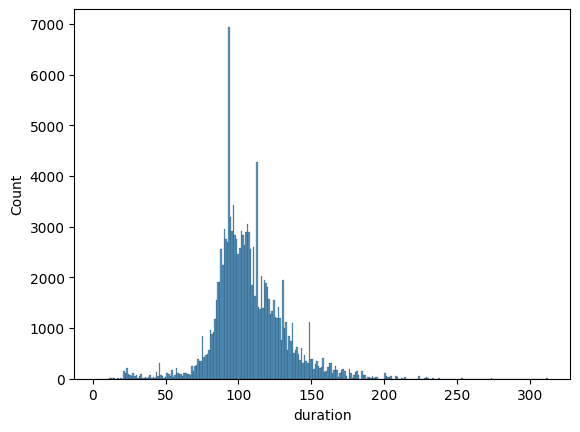

In [ ]:
sns.histplot(movies['duration'])

In [ ]:
# converting the duration values into categorical bins
duration_points = [0,30,60,90,120,150,180,210,240,270,300,350,400,500]
duration_labels = ['0-30','30-60','60-90','90-120','120-150','150-180','180-210','210-240','240-270','270-300','300-350','350-400','400-500']
movies['duration_group'] = pd.cut(movies['duration'],bins = duration_points,labels = duration_labels)

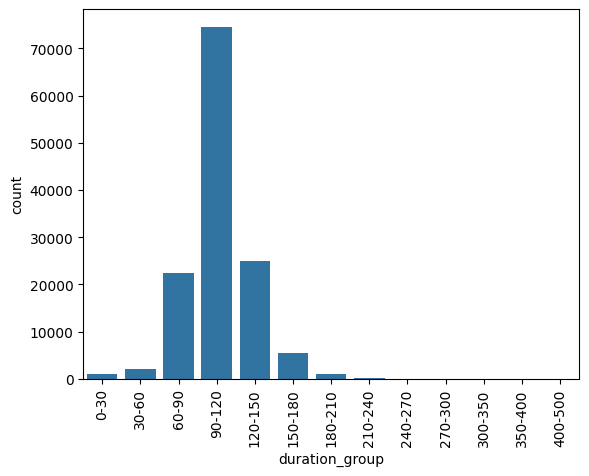

In [ ]:
sns.countplot(x = 'duration_group',data = movies)
plt.xticks(rotation = 90)
plt.show()

Observations

*   As you can see in the above visualization the most movies are of duration  between 90 min and 120 min



In [ ]:
# creating a new data frame for TV shows
shows = pd.DataFrame(data_1.loc[data_1['type'] == 'TV Show'])

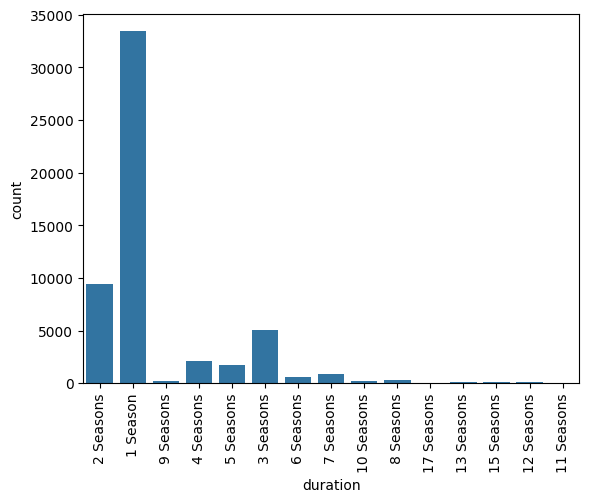

In [ ]:
sns.countplot(x = 'duration',data = shows)
plt.xticks(rotation = 90)
plt.show()

Most of the TV Shows have only one season

In [ ]:
movies_shows_count = data_1.groupby('type').agg({'title':'nunique'})

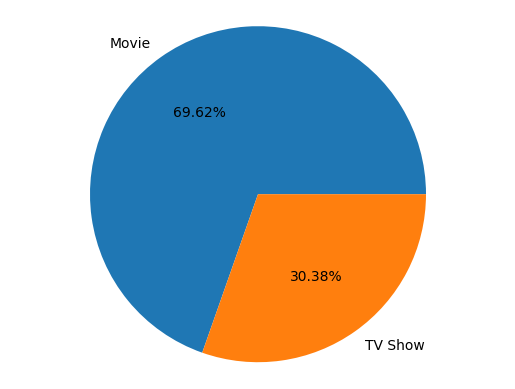

In [ ]:
plt.pie(movies_shows_count['title'],labels = movies_shows_count.index,autopct = '%.2f%%')
plt.axis('equal')
plt.show()

we have 70:30 ratio of movies and Tvshows in our data

In [ ]:
# No of movies per country
no_of_movies_per_country = data_1.groupby('country').agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index().head(25)

In [ ]:
no_of_movies_per_country = no_of_movies_per_country.loc[no_of_movies_per_country['country'] != 'Unknown country']

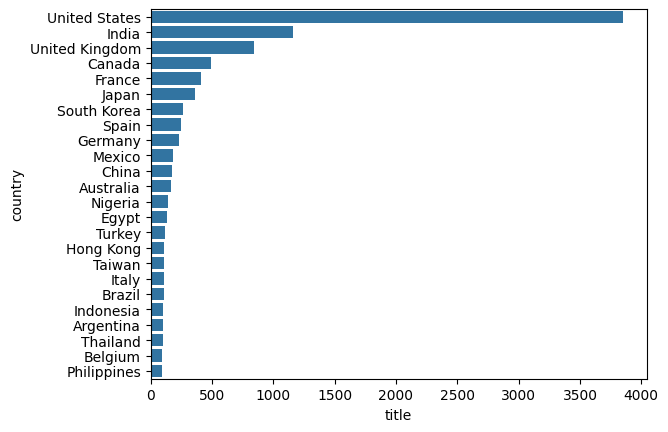

In [ ]:
sns.barplot(x = 'title',y = 'country',data = no_of_movies_per_country)
plt.yticks(rotation = 0)
plt.show()

Top 5 countries with total no of movies per country:

1.United States

2.India

3.United Kingdom

4.Canada

5.France

In [ ]:
# No of movies per genre
data_genre = data_1.groupby('listed_in').agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index().head(25)

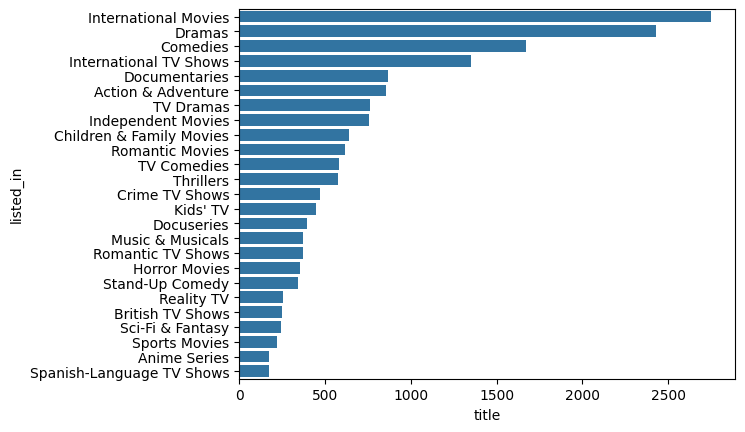

In [ ]:
sns.barplot(x = 'title',y = 'listed_in',data = data_genre)
plt.yticks(rotation = 0)
plt.show()

Most popular genre in Netflix:

1.International Movies

2.Dramas

3.Comidies

4.International TV shows

5.Documentaries

In [ ]:
# Total no of movies added per year
data_year = data_1.groupby('year_added').agg({'title':'nunique'}).sort_values(['year_added']).reset_index()

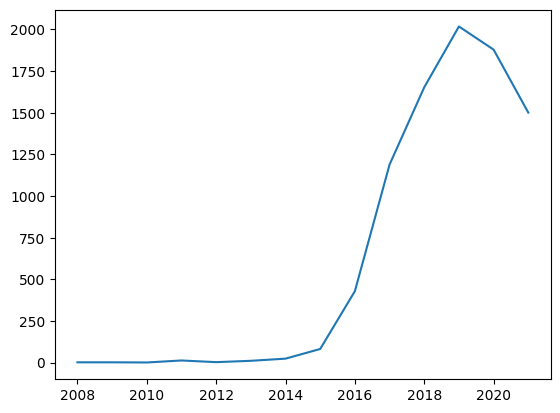

In [ ]:
plt.plot(data_year['year_added'],data_year['title'])
plt.show()

Netflix added most of the movies starting from year 2016

In [ ]:
data_year_1 = data_1.groupby(['year_added','type']).agg({'title':'nunique'}).sort_values(['year_added']).reset_index()

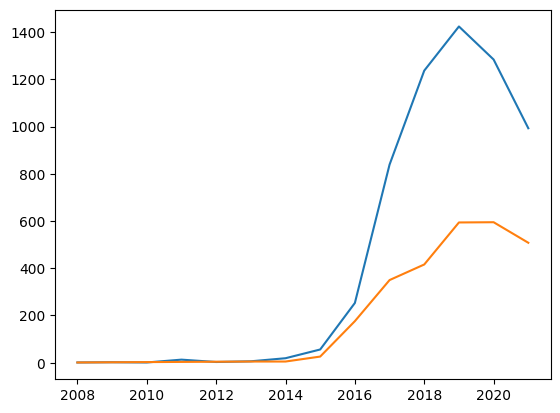

In [ ]:
plt.plot(data_year_1.loc[data_year_1['type'] == 'Movie']['year_added'],data_year_1.loc[data_year_1['type'] == 'Movie']['title'])
plt.plot(data_year_1.loc[data_year_1['type'] == 'TV Show']['year_added'],data_year_1.loc[data_year_1['type'] == 'TV Show']['title'])

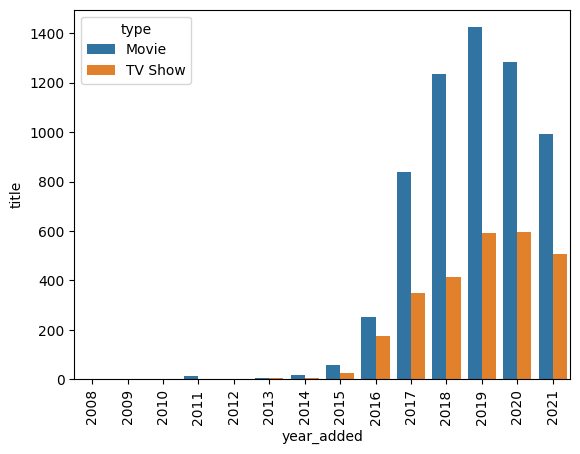

In [ ]:
sns.barplot(x = 'year_added',y = 'title',hue = 'type',data = data_year_1)
plt.xticks(rotation = 90)
plt.show()

Highest no of movies and TV shows were added in the year 2018

In [ ]:
# No of movies per each rating
data_rating = data_1.groupby('rating').agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index()
data_rating  = data_rating.loc[data_rating['rating'] != 'Not rated']

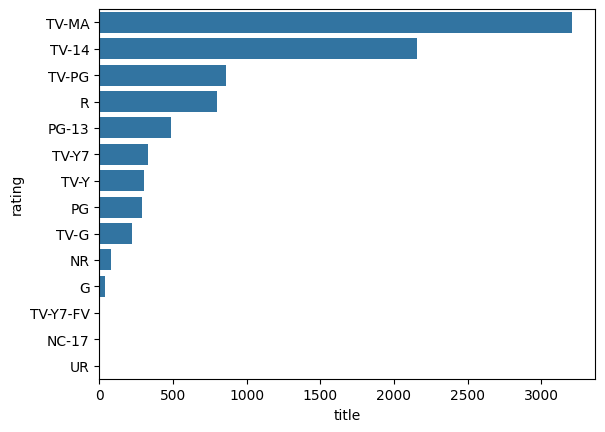

In [ ]:
sns.barplot(x = 'title',y = 'rating',data = data_rating)
plt.xticks(rotation = 0)
plt.show()

Most of the movies in the netflix are meant for mature audience (TV-MA) i.e. viewers with age above 17

In [ ]:
# Total no of movies per director
data_director = data_1.groupby('director').agg({'title':'nunique'}).sort_values(['title'], ascending = False).reset_index().head(25)

In [ ]:
data_director = data_director.loc[data_director['director'] != 'Unknown director']

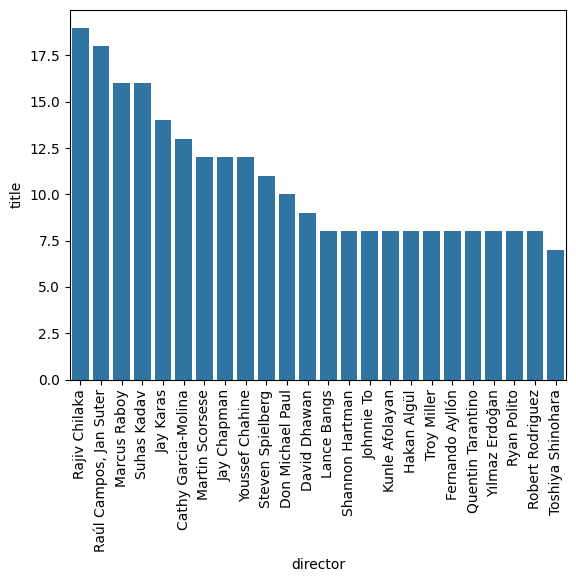

In [ ]:
sns.barplot(x = 'director',y = 'title',data = data_director)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Total no of movies added in the platform for each month
data_month = data_1.groupby('month_added').agg({'title':'nunique'}).sort_values(['month_added'], ascending = True).reset_index()

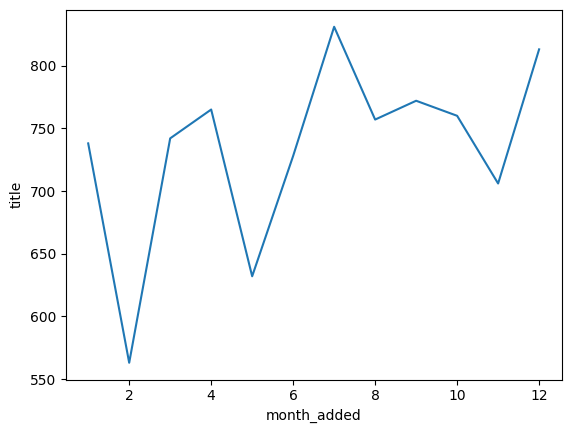

In [ ]:
sns.lineplot(data = data_month, x= 'month_added',y = 'title')
plt.show()

As you can see most the movies and TV shows are added in the month of january,
 june, july and december

In [ ]:
# actors with most no of movies in the netflix platform
data_cast = data_1.groupby('cast').agg({'title':'nunique'}).sort_values(['title'], ascending = False).reset_index().head(25)

In [ ]:
data_cast = data_cast.loc[data_cast['cast'] != 'Unknown cast']

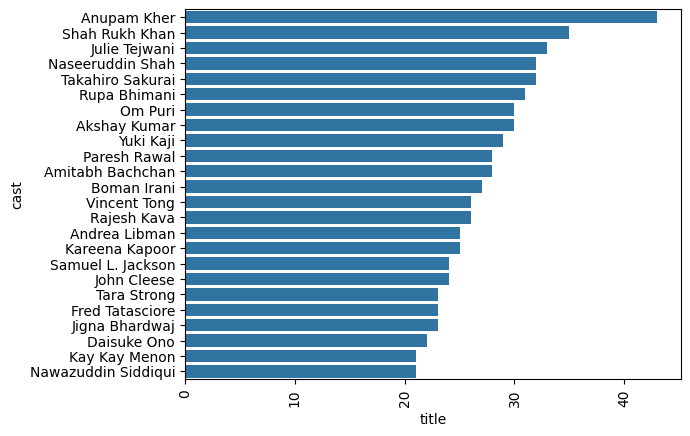

In [ ]:
sns.barplot(data = data_cast,x = 'title',y = 'cast')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Analysis over USA country

ANALYSIS OVER USA COUNTRY

In [ ]:
data_usa = data_1.loc[data_1['country'] == 'United States']

In [ ]:
data_usa.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,modified_date_added,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,2021-09-25,2021,9,25
5,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,United States,"September 24, 2021",2021,TV-MA,1 Season,TV Dramas,2021-09-24,2021,9,24
5,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,United States,"September 24, 2021",2021,TV-MA,1 Season,TV Horror,2021-09-24,2021,9,24
5,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,United States,"September 24, 2021",2021,TV-MA,1 Season,TV Mysteries,2021-09-24,2021,9,24
5,s6,TV Show,Midnight Mass,Mike Flanagan,Zach Gilford,United States,"September 24, 2021",2021,TV-MA,1 Season,TV Dramas,2021-09-24,2021,9,24


In [ ]:
data_usa_movie = pd.DataFrame(data_usa.loc[data_usa['type'] == 'Movie'])

In [ ]:
data_usa_shows = pd.DataFrame(data_usa.loc[data_usa['type'] == 'TV Show'])

In [ ]:
data_usa_type = data_usa.groupby('type').agg({'title':'nunique'})

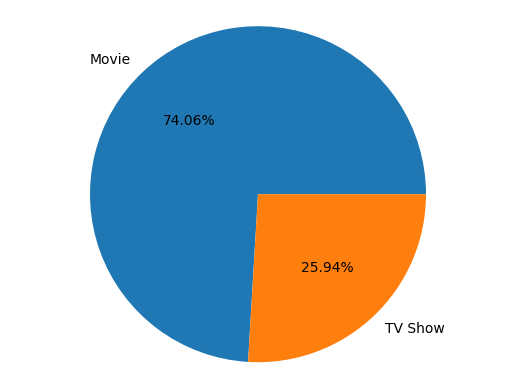

In [ ]:
plt.pie(data_usa_type['title'],labels = data_usa_type.index,autopct = '%.2f%%')
plt.axis('equal')
plt.show()

In the country USA 75 % are movies and 25 % are TV shows in the netflix platform

In [ ]:
data_usa_year = data_usa.groupby(['year_added','type']).agg({'title':'nunique'}).sort_values(['year_added']).reset_index()

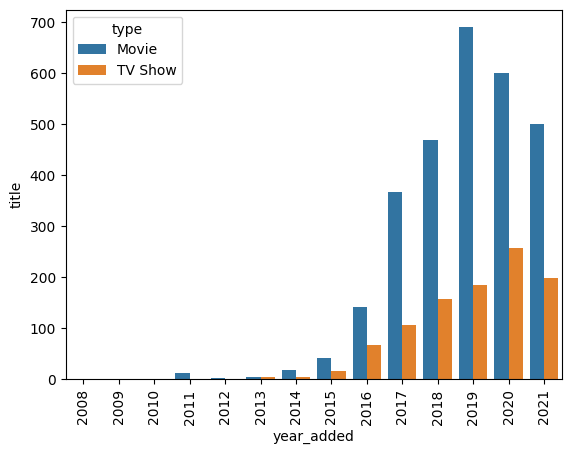

In [ ]:
sns.barplot(x = 'year_added',y = 'title',hue = 'type',data = data_usa_year)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_usa_month = data_usa.groupby('month_added').agg({'title':'nunique'}).sort_values(['month_added'], ascending = True).reset_index()

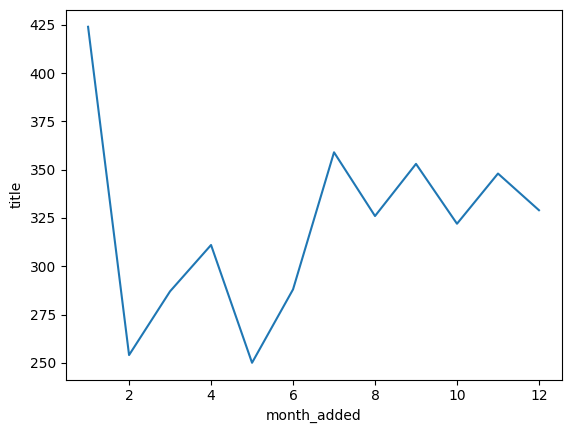

In [ ]:
sns.lineplot(data = data_usa_month, x= 'month_added',y = 'title')
plt.show()

In [ ]:
data_usa_movies_genre = data_usa_movie.groupby('listed_in').agg({'title':'nunique'}).sort_values(['title'], ascending = False).reset_index().head(10)

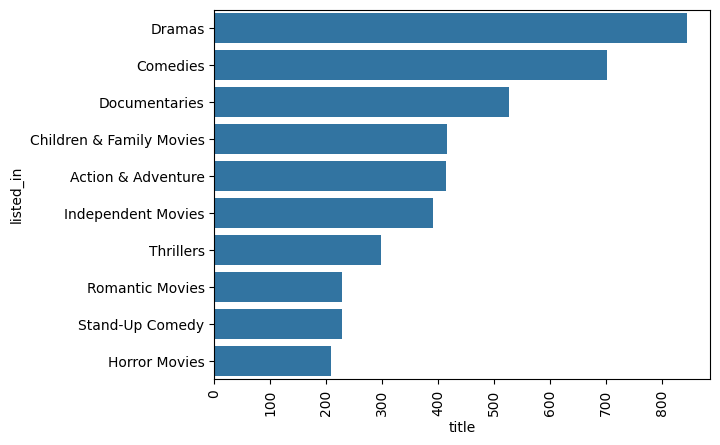

In [ ]:
sns.barplot(x = 'title',y = 'listed_in',data = data_usa_movies_genre)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_usa_shows_genre = data_usa_shows.groupby('listed_in').agg({'title':'nunique'}).sort_values(['title'], ascending = False).reset_index().head(10)

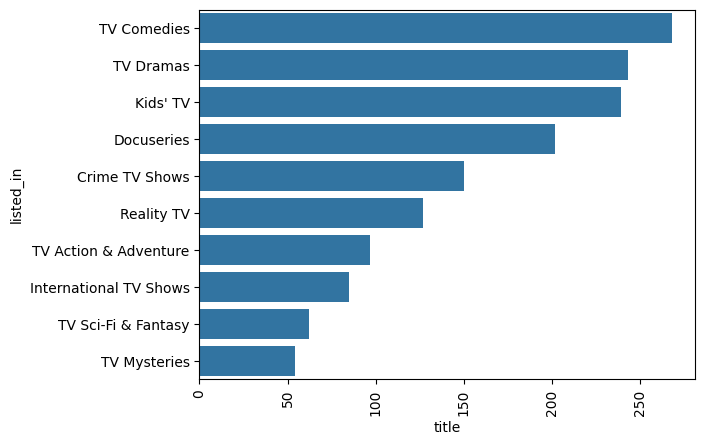

In [ ]:
sns.barplot(x = 'title',y = 'listed_in',data = data_usa_shows_genre)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_usa_movies_rating = data_usa_movie.groupby('rating').agg({'title':'nunique'}).sort_values(['title'], ascending = False).reset_index()
data_usa_movies_rating = data_usa_movies_rating.loc[data_usa_movies_rating['rating'] != 'Not rated']

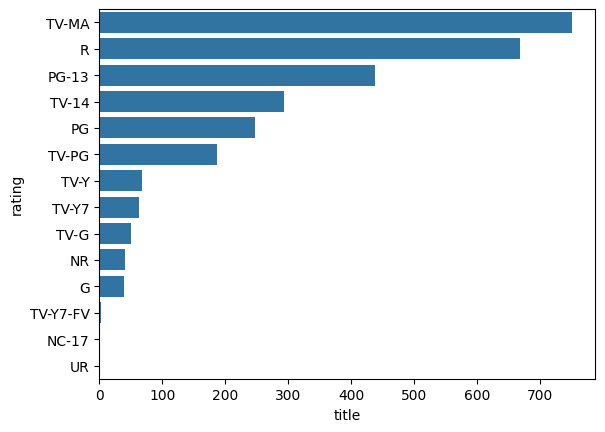

In [ ]:
sns.barplot(x = 'title',y = 'rating',data = data_usa_movies_rating)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
data_usa_shows_rating = data_usa_shows.groupby('rating').agg({'title':'nunique'}).sort_values(['title'], ascending = False).reset_index()
data_usa_shows_rating = data_usa_shows_rating.loc[data_usa_shows_rating['rating'] != 'Not rated']

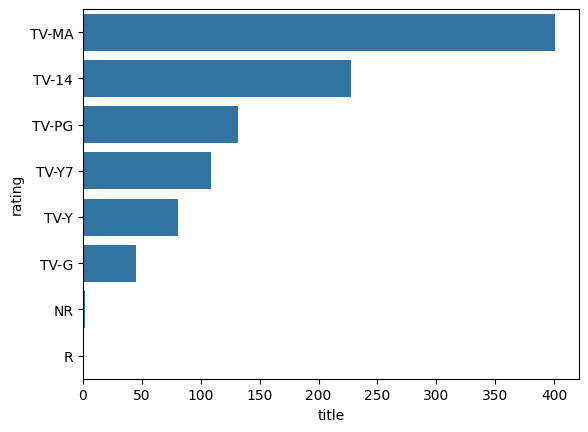

In [ ]:
sns.barplot(x = 'title',y = 'rating',data = data_usa_shows_rating)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
data_usa_movie['duration'] = data_usa_movie['duration'].str.split(' ').str[0]

In [ ]:
data_usa_movie['duration'] = data_usa_movie['duration'].astype(int)

In [ ]:
data_usa_movie['duration_group'] = pd.cut(data_usa_movie['duration'],bins = duration_points,labels = duration_labels)

In [ ]:
data_usa_movie_duration_group = data_usa_movie.groupby('duration_group').agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index()

<ipython-input-83-e19e6776eecb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_usa_movie_duration_group = data_usa_movie.groupby('duration_group').agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index()


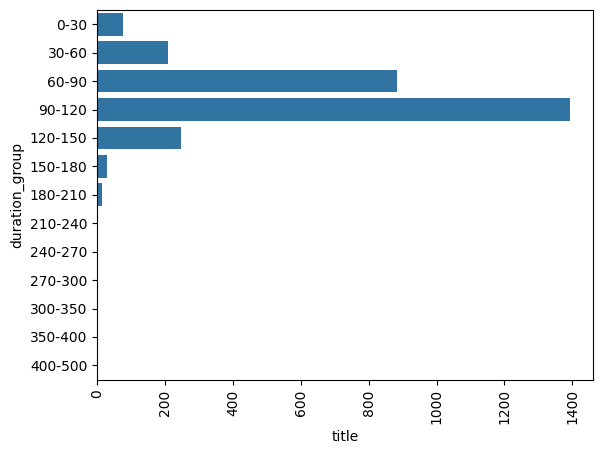

In [ ]:
sns.barplot(x = 'title',y = 'duration_group',data = data_usa_movie_duration_group)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_usa_shows_duration = data_usa_shows.groupby('duration').agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index()

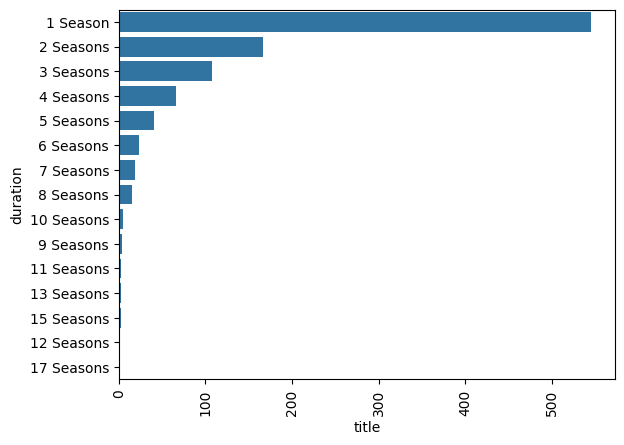

In [ ]:
sns.barplot(x = 'title',y = 'duration',data = data_usa_shows_duration)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_usa_movie = data_usa_movie.loc[data_usa_movie['director'] != 'Unknown director']
data_usa_movie.groupby(['listed_in','director']).agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index().head(30)

,listed_in,director,title
0,Stand-Up Comedy,Marcus Raboy,15
1,Stand-Up Comedy,Jay Karas,13
2,Stand-Up Comedy,Jay Chapman,12
3,Dramas,Martin Scorsese,9
4,Action & Adventure,Don Michael Paul,9
5,Stand-Up Comedy,Shannon Hartman,8
6,Stand-Up Comedy,Lance Bangs,8
7,Stand-Up Comedy,Troy Miller,7
8,Children & Family Movies,Robert Rodriguez,7
9,Stand-Up Comedy,Ryan Polito,7


In [ ]:
data_usa_cast = data_usa.loc[data_usa['cast'] != 'Unknown cast']

In [ ]:
data_usa_cast = data_usa_cast.groupby('cast').agg({'title':'nunique'}).sort_values(['title'], ascending = False).reset_index().head(25)

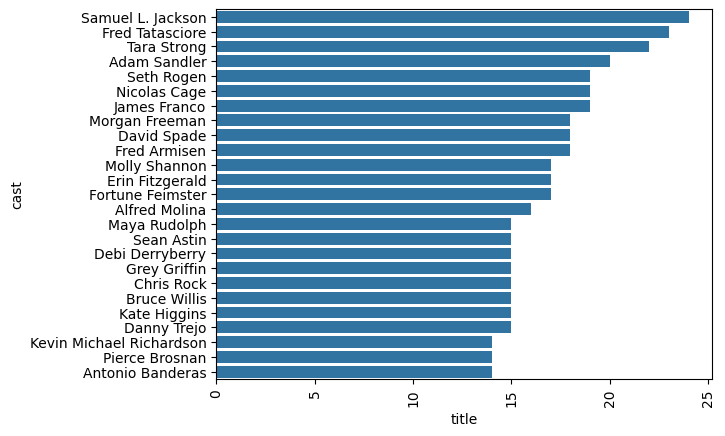

In [ ]:
sns.barplot(data = data_usa_cast,x = 'title',y = 'cast')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_usa_month_movie_show = data_usa.groupby(['month_added','type']).agg({'title':'nunique'}).sort_values(['month_added']).reset_index()

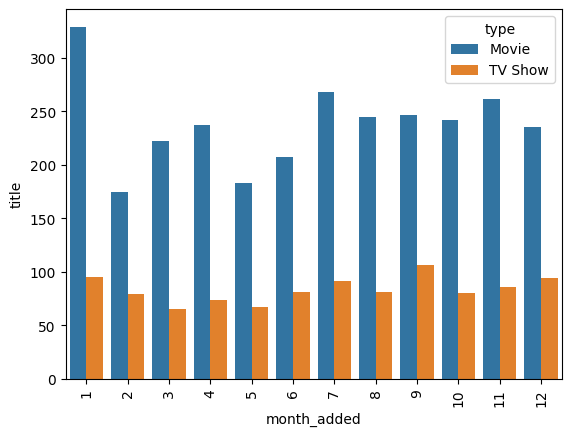

In [ ]:
sns.barplot(x = 'month_added',y = 'title',hue = 'type',data = data_usa_month_movie_show)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_ind = pd.DataFrame(data_1.loc[data_1['country'] == 'India'])

In [ ]:
data_ind_movies = pd.DataFrame(data_ind.loc[data_ind['type'] == 'Movie'])

In [ ]:
data_ind_movies['duration'] = data_ind_movies['duration'].str.split(' ').str[0]

In [ ]:
data_ind_movies['duration'] = data_ind_movies['duration'].astype('int')

In [ ]:
data_ind_movies['duration_group'] = pd.cut(data_ind_movies['duration'],bins = duration_points,labels = duration_labels)

In [ ]:
categorical_list = ['duration_group','listed_in','rating','director','cast']
categorical_name = ['Movie_Duration','Genre','Rating','Director','Cast']

<ipython-input-117-5006e1f88618>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_ind_movies_dict[categorical_list[i]] = data_ind_movies.groupby(categorical_list[i]).agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index().head(10)


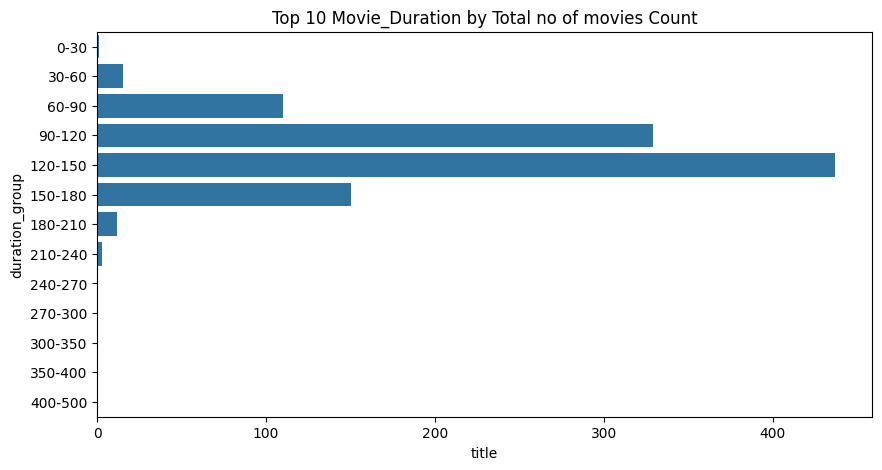

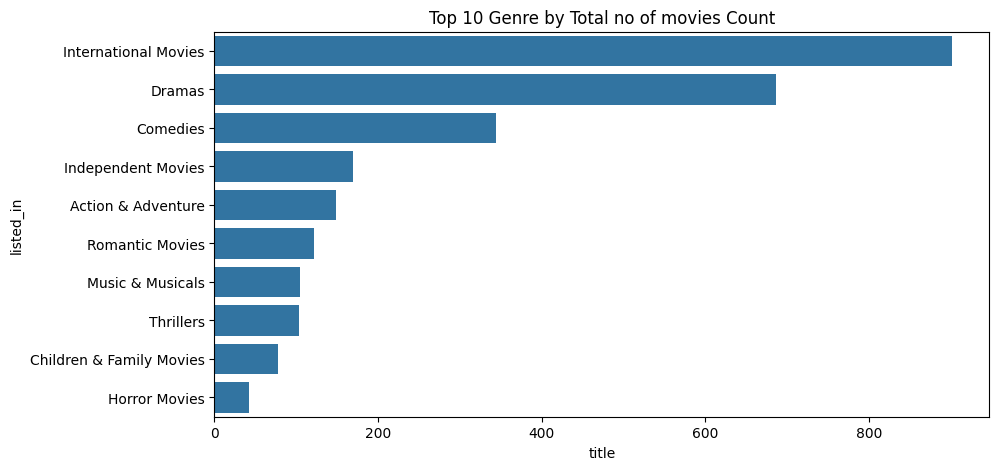

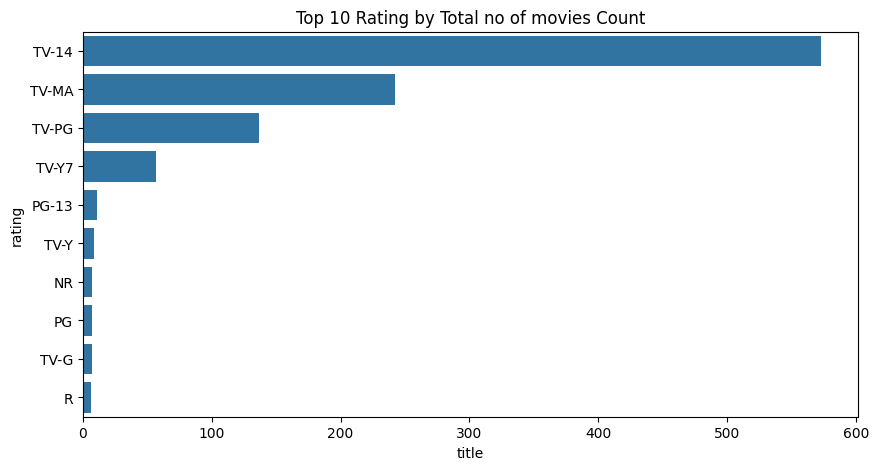

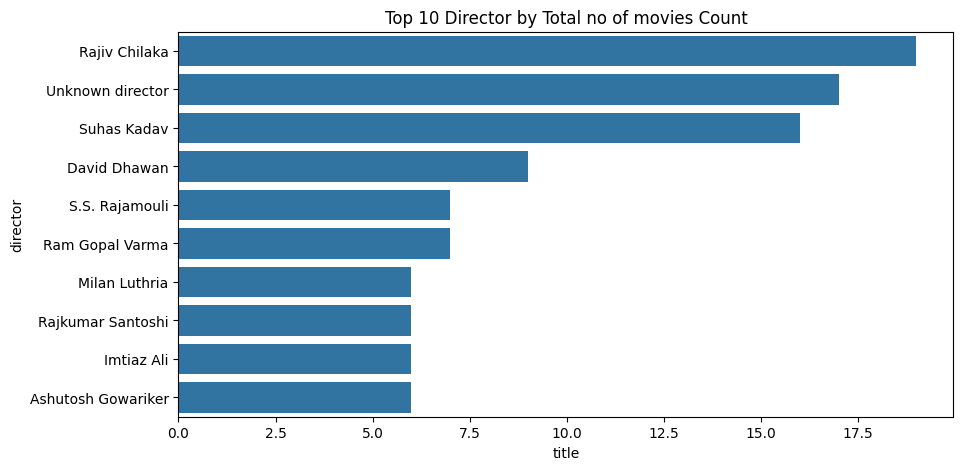

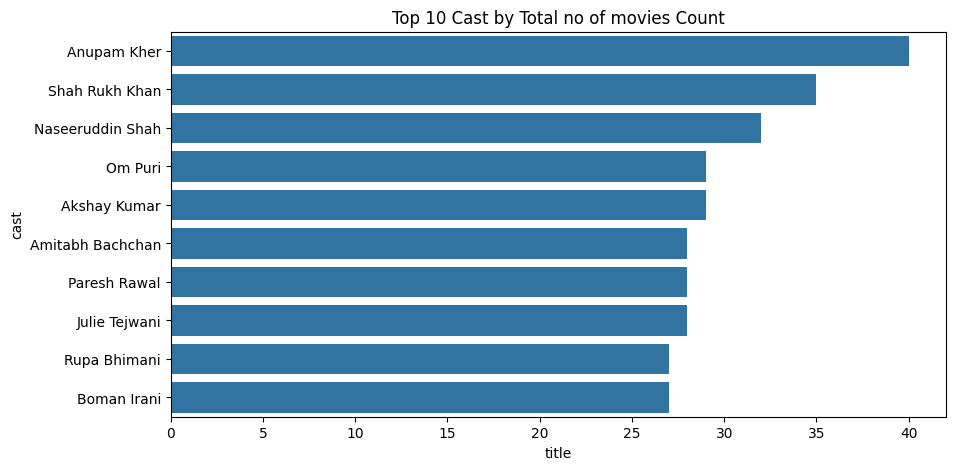

In [ ]:
data_ind_movies_dict = {}
for i in range(len(categorical_list)):
  data_ind_movies_dict[categorical_list[i]] = data_ind_movies.groupby(categorical_list[i]).agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index().head(10)
  plt.figure(figsize = (10,5))
  sns.barplot(x = 'title',y = categorical_list[i],data = data_ind_movies_dict[categorical_list[i]])
  plt.title(f'Top 10 {categorical_name[i]} by Total no of movies Count')
  plt.show()
  print("\n")

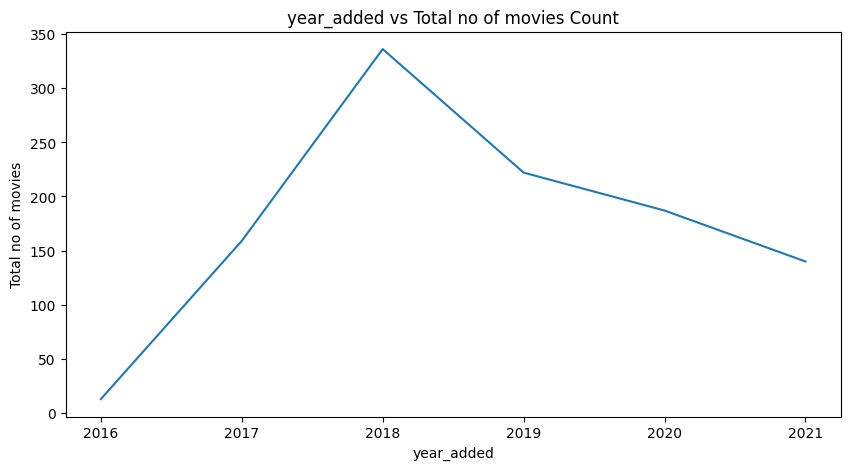

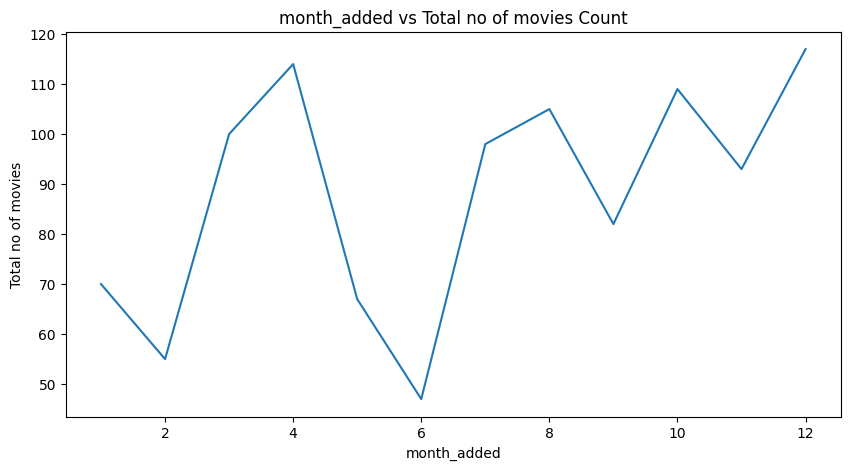

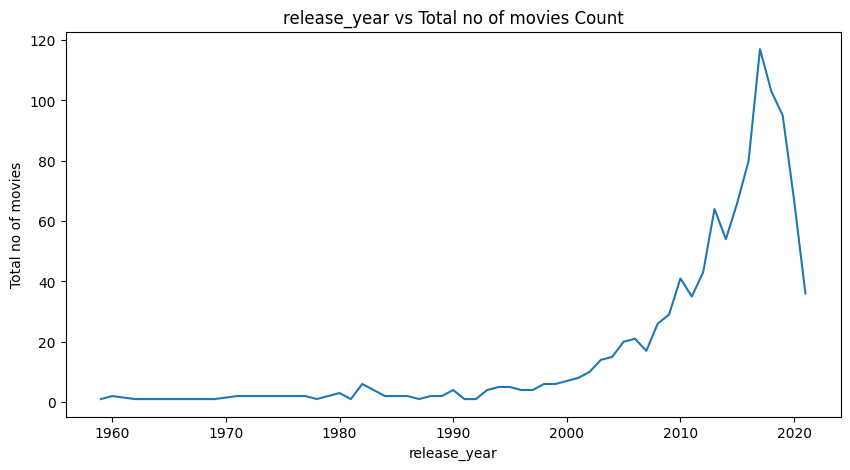

In [ ]:
numerical_list = ['year_added','month_added','release_year']
data_ind_movies_dict = {}
for i in range(len(numerical_list)):
  data_ind_movies_dict[numerical_list[i]] = data_ind_movies.groupby(numerical_list[i]).agg({'title':'nunique'}).sort_values([numerical_list[i]],ascending = False).reset_index()
  plt.figure(figsize = (10,5))
  sns.lineplot(data = data_ind_movies_dict[numerical_list[i]], x= numerical_list[i],y = 'title')
  plt.title(f'{numerical_list[i]} vs Total no of movies Count')
  plt.ylabel('Total no of movies')
  plt.xlabel(numerical_list[i])
  plt.show()
  print("\n")

In [ ]:
data_ind_dir_genre = data_ind.groupby(['director','listed_in']).agg({'title':'nunique'}).sort_values(['title'],ascending = False).reset_index()

In [ ]:
data_ind_dir_genre = data_ind_dir_genre.loc[data_ind_dir_genre['director'] != 'Unknown director']

In [ ]:
for i in data_ind_dir_genre['listed_in'].unique():
  data_ind_dir_genre_1 = data_ind_dir_genre.loc[data_ind_dir_genre['listed_in'] == i].head(1)
  print(f'popular Director for {i} in India : {data_ind_dir_genre_1["director"].values[0]}')
  print("\n")

popular Director for Children & Family Movies in India : Rajiv Chilaka


popular Director for Comedies in India : David Dhawan


popular Director for International Movies in India : David Dhawan


popular Director for Action & Adventure in India : S.S. Rajamouli


popular Director for Dramas in India : S.S. Rajamouli


popular Director for Music & Musicals in India : Suhas Kadav


popular Director for Horror Movies in India : Rathindran R Prasad


popular Director for Romantic Movies in India : Imtiaz Ali


popular Director for Thrillers in India : Rathindran R Prasad


popular Director for Classic Movies in India : Hrishikesh Mukherjee


popular Director for Independent Movies in India : Onir


popular Director for Sci-Fi & Fantasy in India : Remo D'Souza


popular Director for Crime TV Shows in India : Vikramaditya Motwane, Anurag Kashyap


popular Director for International TV Shows in India : Vikramaditya Motwane, Anurag Kashyap


popular Director for Documentaries in India : Rudra